## 모듈(model_lib) 다시 불러오기

In [1]:
# from imp import reload
# reload(lib)

# 모델 만들기

1. 모델 3 만들기 (정규화 프로필, 평균 프로필)
2. 모델 3 클러스터링 (K-means)
3. 모델 2 ANOVA analysis
4. 모델 4 ANOVA analysis

In [2]:
# 업태 이름
category_ami = 'education'

# 새로운 전처리파일 / 모델파일 생길 폴더
maindir = 'D:\\project\\교육서비스업'

# 세대별 365일 raw 파일(.xlsx) 들어있는 폴더
rawdir = 'D:\\project\\교육서비스업\\0_raw'

# 새로 생성될 주중/주말 폴더명 이름
folderlist = ['[P.교육 서비스업(85)]_주중', '[P.교육 서비스업(85)]_주말']

# 새로 생성될 과정별 폴더 이름
progressfolder = ['1_주말_주중_나누기', '2_결측값_기준_이하_제거', '3_이상치제거', '4_선형보간', \
                  '5_전처리완료', '6_최종', 'model2', 'model3', 'model3_clustering', 'model4', '결과플로팅']


splitdir = maindir + '\\1_주말_주중_나누기'
sortdir = maindir + '\\2_결측값_기준_이하_제거'
outlierdir = maindir + '\\3_이상치제거'
dirbtween = maindir + '\\4_선형보간'
donedir = maindir + '\\5_전처리완료'
finaldir = maindir + '\\6_최종'

model2dir = maindir + '\\model2'
model3dir = maindir + '\\model3'
model3cluster = maindir + '\\model3_clustering'
model4dir = maindir + '\\model4'
plotdir = maindir + '\\결과플로팅'

In [3]:
import sys
sys.path.append('C:\\Users\\joo09\\Documents\\GitHub\\LIBRARY')
import model_lib as lib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import math
import shutil
from sklearn.cluster import KMeans

# Model2, Model3, Model3cluster, Model4 폴더 리셋

In [4]:
string = 'model2dir'
print(locals()[string])

D:\project\교육서비스업\model2


In [5]:
# '1_주말_주중_나누기' 폴더의 하위폴더명이 기준

reset_dirs = ['model2dir', 'model3dir', 'model3cluster', 'model4dir']
only_reset = ['model3cluster']
folderlist = []

for folder in os.listdir(splitdir) :
    tempdir = splitdir + '\\' + folder
    if os.path.isdir(tempdir) :
        folderlist.append(folder)
        
for directory in reset_dirs :
    tempdir = locals()[directory]
    for everything in os.listdir(tempdir) :
        lib.remove(tempdir + '\\' + everything)
    for directory2 in only_reset :
        tempdir2 = locals()[directory2]
        if tempdir != tempdir2 :
            for folder in folderlist :
                lib.newfolderlist(tempdir, folderlist)

print('reset done')

reset done


# Model 3

In [6]:
folderlist = []
for folder in os.listdir(finaldir) :
    tempdir = finaldir + '\\' + folder
    if '주중' in folder :
        folderlist.append(folder)
        folderdays = folder
        osdays = tempdir
    elif '주말' in folder :
        folderlist.append(folder)
        folderends = folder
        osends = tempdir

lib.newfolderlist(model3dir, folderlist)
        
hours = []
for i in range(1, 25) :
    hours.append(i)
        
hours_extend = []
for i in range(1, 49) :
    hours_extend.append(i)
        
for excel in os.listdir(osdays) :
    os.chdir(osdays)
    temp = lib.read_excel(excel)
    temp_m2 = pd.DataFrame(columns = temp.columns)
    for index in range(temp.shape[0]) :
        total_index = temp.loc[index, :].sum()
        for cat in temp.columns :
            temp_m2.loc[index, cat] = temp.loc[index, cat] / total_index
    
    print(temp.shape, temp_m2.shape)
    os.chdir(model3dir + '\\' + folderdays)
    temp_m2.to_excel(excel)
    
for excel in os.listdir(osends) :
    os.chdir(osends)
    temp = lib.read_excel(excel)
    temp_m2 = pd.DataFrame(columns = temp.columns)
    for index in range(temp.shape[0]) :
        total_index = temp.loc[index, :].sum()
        for cat in temp.columns :
            temp_m2.loc[index, cat] = temp.loc[index, cat] / total_index
    
    print(temp.shape, temp_m2.shape)
    os.chdir(model3dir + '\\' + folderends)
    temp_m2.to_excel(excel)

(261, 24) (261, 24)
(260, 24) (260, 24)
(261, 24) (261, 24)
(261, 24) (261, 24)
(256, 24) (256, 24)
(261, 24) (261, 24)
(261, 24) (261, 24)
(255, 24) (255, 24)
(259, 24) (259, 24)
(261, 24) (261, 24)
(260, 24) (260, 24)
(260, 24) (260, 24)
(261, 24) (261, 24)
(261, 24) (261, 24)
(261, 24) (261, 24)
(261, 24) (261, 24)
(261, 24) (261, 24)
(258, 24) (258, 24)
(261, 24) (261, 24)
(259, 24) (259, 24)
(261, 24) (261, 24)
(261, 24) (261, 24)
(261, 24) (261, 24)
(257, 24) (257, 24)
(257, 24) (257, 24)
(261, 24) (261, 24)
(261, 24) (261, 24)
(260, 24) (260, 24)
(257, 24) (257, 24)
(259, 24) (259, 24)
(261, 24) (261, 24)
(261, 24) (261, 24)
(261, 24) (261, 24)
(260, 24) (260, 24)
(260, 24) (260, 24)
(261, 24) (261, 24)
(260, 24) (260, 24)
(258, 24) (258, 24)
(260, 24) (260, 24)
(260, 24) (260, 24)
(258, 24) (258, 24)
(260, 24) (260, 24)
(256, 24) (256, 24)
(257, 24) (257, 24)
(259, 24) (259, 24)
(261, 24) (261, 24)
(255, 24) (255, 24)
(255, 24) (255, 24)
(261, 24) (261, 24)
(255, 24) (255, 24)


In [7]:
df = pd.DataFrame(columns = ['excel'] + hours_extend)
df.columns = df.columns.astype(str)
df_num = 0

for folder in os.listdir(model3dir) :
    tempdir = model3dir + '\\' + folder
    if '주중' in folder :
        folderdays = folder
        model3days = tempdir
    elif '주말' in folder :
        folderends = folder
        model3ends = tempdir

for excel in os.listdir(model3days) :
    os.chdir(model3days)
    temp = lib.read_excel(excel)
    for excel2 in os.listdir(model3ends) :
        os.chdir(model3ends)
        if excel[ : -7] == excel2[ : -7] :
            excel_match = excel2
            temp2 = lib.read_excel(excel_match)
    temp.columns = temp.columns.astype(str)
    temp2.columns = temp2.columns.astype(str)
    
    df.loc[df_num, 'excel'] = excel[: -7]
    
    temp_ave = pd.DataFrame(columns = temp.columns)
    temp_ave2 = pd.DataFrame(columns = temp2.columns)
    
    ave_num = 0
    
    for cat in temp_ave.columns :
        temp_ave.loc[ave_num, cat] = temp.loc[ : , cat].mean()
        
    for cat in temp_ave2.columns :
        temp_ave2.loc[ave_num, cat] = temp2.loc[ : , cat].mean() 
        
#     print(temp_ave)
        
    df.loc[df_num, '1' : '48'] = temp_ave.loc[ave_num, '1' : '24'].tolist() \
                                + temp_ave2.loc[ave_num, '1' : '24'].tolist()
    print('{}. {} is done'.format(excel, excel_match))
    
    df_num += 1
    
os.chdir(model3dir)
df.to_excel('profile_48.xlsx')
print(df.shape)
df

[P.교육 서비스업(85)]_0_주중.xlsx. [P.교육 서비스업(85)]_0_주말.xlsx is done
[P.교육 서비스업(85)]_10_주중.xlsx. [P.교육 서비스업(85)]_10_주말.xlsx is done
[P.교육 서비스업(85)]_11_주중.xlsx. [P.교육 서비스업(85)]_11_주말.xlsx is done
[P.교육 서비스업(85)]_12_주중.xlsx. [P.교육 서비스업(85)]_12_주말.xlsx is done
[P.교육 서비스업(85)]_134_주중.xlsx. [P.교육 서비스업(85)]_134_주말.xlsx is done
[P.교육 서비스업(85)]_14_주중.xlsx. [P.교육 서비스업(85)]_14_주말.xlsx is done
[P.교육 서비스업(85)]_16_주중.xlsx. [P.교육 서비스업(85)]_16_주말.xlsx is done
[P.교육 서비스업(85)]_172_주중.xlsx. [P.교육 서비스업(85)]_172_주말.xlsx is done
[P.교육 서비스업(85)]_17_주중.xlsx. [P.교육 서비스업(85)]_17_주말.xlsx is done
[P.교육 서비스업(85)]_18_주중.xlsx. [P.교육 서비스업(85)]_18_주말.xlsx is done
[P.교육 서비스업(85)]_1_주중.xlsx. [P.교육 서비스업(85)]_1_주말.xlsx is done
[P.교육 서비스업(85)]_21_주중.xlsx. [P.교육 서비스업(85)]_21_주말.xlsx is done
[P.교육 서비스업(85)]_23_주중.xlsx. [P.교육 서비스업(85)]_23_주말.xlsx is done
[P.교육 서비스업(85)]_25_주중.xlsx. [P.교육 서비스업(85)]_25_주말.xlsx is done
[P.교육 서비스업(85)]_26_주중.xlsx. [P.교육 서비스업(85)]_26_주말.xlsx is done
[P.교육 서비스업(85)]_27_주중.xlsx. [P.교육 서비스업(85)]_27_주말.xlsx 

,excel,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,[P.교육 서비스업(85)]_0_,0.018771,0.018549,0.01846,0.018822,0.021075,0.022364,0.026485,0.035822,0.063907,...,0.04142,0.0409,0.041876,0.041694,0.043458,0.043118,0.042716,0.042149,0.041194,0.041334
1,[P.교육 서비스업(85)]_10_,0.011182,0.011271,0.011594,0.011611,0.011564,0.011896,0.013866,0.025621,0.067429,...,0.036749,0.037546,0.039904,0.041982,0.041458,0.040965,0.03992,0.039825,0.039042,0.038807
2,[P.교육 서비스업(85)]_11_,0.019619,0.019278,0.019721,0.019511,0.019679,0.019708,0.022595,0.032292,0.058264,...,0.042861,0.041821,0.041202,0.039035,0.038975,0.038714,0.039129,0.038123,0.038956,0.038117
3,[P.교육 서비스업(85)]_12_,0.019894,0.019932,0.01992,0.020036,0.020363,0.024143,0.032377,0.05506,0.067587,...,0.032453,0.037011,0.04254,0.046166,0.048556,0.048657,0.048953,0.047928,0.048634,0.046769
4,[P.교육 서비스업(85)]_134_,0.010927,0.011057,0.011125,0.011376,0.011576,0.011445,0.011661,0.017136,0.055705,...,0.043432,0.043628,0.04513,0.043506,0.042535,0.041211,0.040666,0.039935,0.039249,0.039299
5,[P.교육 서비스업(85)]_14_,0.018593,0.018311,0.018381,0.018421,0.018915,0.02217,0.025264,0.04178,0.074523,...,0.037156,0.039275,0.037622,0.040602,0.042643,0.044504,0.046267,0.045994,0.046094,0.04192
6,[P.교육 서비스업(85)]_16_,0.014057,0.014048,0.014239,0.014269,0.014582,0.018158,0.027024,0.034955,0.064236,...,0.042628,0.04222,0.04057,0.038529,0.037093,0.036155,0.034997,0.034586,0.034327,0.034059
7,[P.교육 서비스업(85)]_172_,0.025082,0.019573,0.01376,0.011001,0.00916,0.00783,0.008086,0.008895,0.007842,...,0.044522,0.035841,0.039124,0.039294,0.05078,0.05196,0.056654,0.067006,0.081088,0.075948
8,[P.교육 서비스업(85)]_17_,0.010748,0.010695,0.010734,0.010822,0.011656,0.03061,0.037664,0.046384,0.05938,...,0.050439,0.053958,0.052784,0.048547,0.033889,0.035947,0.036351,0.034083,0.032449,0.032008
9,[P.교육 서비스업(85)]_18_,0.031859,0.025884,0.021147,0.01887,0.021169,0.020598,0.016474,0.033571,0.061927,...,0.045822,0.040053,0.041192,0.031746,0.02898,0.028008,0.043134,0.043972,0.051902,0.051681


# Model 3 clustering

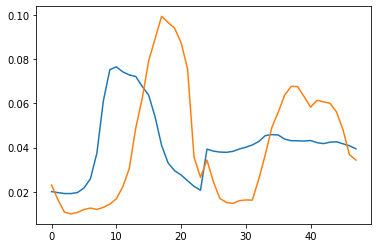

                 1         2         3         4         5         6   \
cluster_0  0.020097  0.019620  0.019213  0.019195  0.019663  0.021706   
cluster_1  0.023055  0.016329  0.010770  0.009989  0.010680  0.011989   

                 7         8         9         10  ...        39        40  \
cluster_0  0.025856  0.037489  0.061148  0.075274  ...  0.043100  0.042969   
cluster_1  0.012625  0.012016  0.012955  0.014432  ...  0.067632  0.063113   

                 41        42        43        44        45        46  \
cluster_0  0.043210  0.042249  0.041822  0.042467  0.042652  0.041741   
cluster_1  0.058317  0.061411  0.060734  0.060085  0.056162  0.048175   

                 47        48  
cluster_0  0.040846  0.039474  
cluster_1  0.036829  0.034383  

[2 rows x 48 columns]


In [8]:
clusternum = 2

data_array = df.loc[:, '1' : ]

model3_kmeans = KMeans(n_clusters = clusternum, random_state = 0).fit(data_array)
idx = model3_kmeans.labels_
centroids = model3_kmeans.cluster_centers_

# print(idx)
# print(len(idx))
# print(model3_kmeans.cluster_centers_)
# print(len(model3_kmeans.cluster_centers_))

for i in range(len(centroids)) :
    plt.plot(centroids[i])
plt.show()

os.chdir(model3cluster)
centroids_df = pd.DataFrame(centroids)

hours_extend = []
for i in range(1, 49) :
    hours_extend.append(i)
    
centroids_index = []
for i in range(centroids_df.shape[0]) :
    centroids_index.append('cluster_{}'.format(i))
    
centroids_df.columns = hours_extend
centroids_df.index = centroids_index
print(centroids_df)
centroids_df.to_excel('군집별_도심_프로필.xlsx')

#### * 아래 코드는 model3cluster 폴더 내의 모든 파일을 지우는 코드를 포함합니다 * 

In [9]:
os.chdir(model3dir)
ave_profile = lib.read_excel('profile_48.xlsx')
ave_profile.reset_index(drop = True, inplace = True)

for folder in os.listdir(model3dir) :
    if os.path.isdir(model3dir + '\\' + folder) :
        if '주중' in folder :
            src_day = model3dir + '\\' + folder
        elif '주말' in folder :
            src_end = model3dir + '\\' + folder
     
                    
for everything in os.listdir(model3cluster) :
    lib.remove(model3cluster + '\\' + everything)

for index in range(min(model3_kmeans.labels_), max(model3_kmeans.labels_) + 1) :
    foldername = 'cluster_{}'.format(index)
    clusterdir = model3cluster + '\\' + foldername
    lib.newfolder(clusterdir)  
    
    for num in range(len(idx)) :
        if idx[num] == index :
            excel_name = ave_profile.loc[num, 'excel']
            
            excel_day = excel_name + '주중.xlsx'
            excel_end = excel_name + '주말.xlsx'
            
            shutil.copyfile(src_day + '\\' + excel_day, clusterdir + '\\' + excel_day)
            shutil.copyfile(src_end + '\\' + excel_end, clusterdir + '\\' + excel_end)
    
    
    print('{} made, {} files in'.format(foldername, len(os.listdir(clusterdir))))


cluster_df = pd.DataFrame(columns = ['excel', 'num_cluster'])
cluster_df.loc[:, 'excel'] = ave_profile.loc[:, 'excel']
cluster_df.loc[:, 'num_cluster'] = idx

print(cluster_df)
os.chdir(model3cluster)
cluster_df.to_excel('세대별_군집_번호.xlsx')
centroids_df.to_excel('군집별_도심_프로필.xlsx')

for index in range(min(model3_kmeans.labels_), max(model3_kmeans.labels_) + 1) :
    foldername = 'cluster_{}'.format(index)
    clusterdir = model3cluster + '\\' + foldername
    
    cluster_profile = pd.DataFrame(columns = ave_profile.columns)
    temp_df = cluster_df[cluster_df['num_cluster'] == index].copy()
    temp_df.reset_index(drop = True, inplace = True)
    cluster_profile.loc[:, 'excel'] = temp_df.loc[:, 'excel']
    for i in range(cluster_profile.shape[0]) :
        for j in range(ave_profile.shape[0]) :
            if cluster_profile.loc[i, 'excel'] == ave_profile.loc[j, 'excel'] : 
                cluster_profile.loc[i, '1' : ] = ave_profile.loc[j, '1' : ]
    
    os.chdir(clusterdir)
    cluster_profile.to_excel('cluster_{}_ave_profile.xlsx'.format(index))
    os.chdir(model3cluster)
    cluster_profile.to_excel('cluster_{}_ave_profile.xlsx'.format(index))


cluster_0 made, 90 files in
cluster_1 made, 14 files in
                   excel  num_cluster
0     [P.교육 서비스업(85)]_0_            0
1    [P.교육 서비스업(85)]_10_            0
2    [P.교육 서비스업(85)]_11_            0
3    [P.교육 서비스업(85)]_12_            0
4   [P.교육 서비스업(85)]_134_            0
5    [P.교육 서비스업(85)]_14_            0
6    [P.교육 서비스업(85)]_16_            0
7   [P.교육 서비스업(85)]_172_            1
8    [P.교육 서비스업(85)]_17_            0
9    [P.교육 서비스업(85)]_18_            0
10    [P.교육 서비스업(85)]_1_            0
11   [P.교육 서비스업(85)]_21_            1
12   [P.교육 서비스업(85)]_23_            0
13   [P.교육 서비스업(85)]_25_            0
14   [P.교육 서비스업(85)]_26_            0
15   [P.교육 서비스업(85)]_27_            0
16   [P.교육 서비스업(85)]_29_            0
17    [P.교육 서비스업(85)]_2_            0
18   [P.교육 서비스업(85)]_34_            0
19   [P.교육 서비스업(85)]_36_            0
20   [P.교육 서비스업(85)]_37_            0
21   [P.교육 서비스업(85)]_38_            0
22   [P.교육 서비스업(85)]_39_            0
23    [P.교육 서비스업(85)]_3_        

#### matlab k-means cvrmse

In [10]:

# elbow = 10;
# clusternum = 3;
# varnum = 48;

# [idx, C, sumd, k] = kmeans(X1, clusternum);
# [idx_el, C_el, sumd_el, k_el] = kmeans(X1, elbow);

# xlswrite('idx_3.xlsx', idx);


# figure(1)
# hold on
# plot(1:varnum,X1(:,1:varnum));
# plot(1:varnum,C(:,1:varnum),'LineWidth',2);
# hold off

# figure(2)
# plot(1:varnum,C(:,1:varnum));

# totSum=zeros(elbow,1);  % preallocate the result
# for i=1:elbow
#   [~,~,sumd_el]=kmeans(X1,i);
#   totSum(i,1)=sum(sumd_el);
# end

# plot(totSum)  % plot of totals versus number (same as index)
# RMSE = sqrt(totSum./(size(X1,1)*(size(X1,2)-2)));
# avg = mean2(X1(:,1 : varnum));
# CVRMSE = RMSE / avg;

# Model 2

1) 일간 사용량의 합 계산, 주중 261개 주말 104개의 합(숫자) 도출  
2) 주중, 주말 각각 표준편차 계산  
3) 미터별로 박스플롯  

4) 모델 3의 클러스터링 결과에 따라 ANOVA analysis  
5) 클러스터 별로 통계적인 차이가 있는지 아닌지 확인 (통계적 차이의 기준?)

In [11]:
from imp import reload 
reload(lib)  

<module 'model_lib' from 'C:\\Users\\joo09\\Documents\\GitHub\\LIBRARY\\model_lib.py'>

In [12]:
for folder in os.listdir(finaldir) :
    tempdir = finaldir + '\\' + folder
    if '주중' in folder :
        df = pd.DataFrame(columns = ['excel', 'std'])
        df_num = 0

        for excel in os.listdir(tempdir) :
            os.chdir(tempdir)
            temp = lib.read_excel(excel)
            alllist = []
            for i in range(temp.shape[0]) :
                tempsum = temp.loc[i, :].sum()
                alllist.append(tempsum)

            temp_std = np.std(alllist)
            df.loc[df_num, 'excel'] = excel
            df.loc[df_num, 'std'] = temp_std
            df_num += 1

        os.chdir(model2dir)
        df.to_excel('model2_weekdays_std.xlsx')
        print('{} done'.format(excel), end = '\r')
    if '주말' in folder :
        df = pd.DataFrame(columns = ['excel', 'std'])
        df_num = 0

        for excel in os.listdir(tempdir) :
            os.chdir(tempdir)
            temp = lib.read_excel(excel)
            alllist = []
            for i in range(temp.shape[0]) :
                tempsum = temp.loc[i, :].sum()
                alllist.append(tempsum)

            temp_std = np.std(alllist)
            df.loc[df_num, 'excel'] = excel
            df.loc[df_num, 'std'] = temp_std
            df_num += 1
        os.chdir(model2dir)
        df.to_excel('model2_weekends_std.xlsx')
        print('{} done'.format(excel), end = '\r')
print('done')

done육 서비스업(85)]_9_주중.xlsx done


In [13]:
os.chdir(model3cluster)
idx = lib.read_excel('세대별_군집_번호.xlsx')
cluster_centroid = lib.read_excel('군집별_도심_프로필.xlsx')
os.chdir(model2dir)
std_days = lib.read_excel('model2_weekdays_std.xlsx')
std_ends = lib.read_excel('model2_weekends_std.xlsx')


std_idx_days = pd.DataFrame(columns = ['excel', 'std', 'num_cluster'])
num_days = 0
std_idx_ends = pd.DataFrame(columns = ['excel', 'std', 'num_cluster'])
num_ends = 0

for i in range(idx.shape[0]) :
    for j in range(std_days.shape[0]) :
        if idx.loc[i, 'excel'] in std_days.loc[j, 'excel'] :
            std_idx_days.loc[num_days, 'excel'] = std_days.loc[j, 'excel']
            std_idx_days.loc[num_days, 'std'] = std_days.loc[j, 'std']
            std_idx_days.loc[num_days, 'num_cluster'] = idx.loc[i, 'num_cluster']
            num_days += 1
            
    for j in range(std_ends.shape[0]) :
        if idx.loc[i, 'excel'] in std_ends.loc[j, 'excel'] :
            std_idx_ends.loc[num_ends, 'excel'] = std_ends.loc[j, 'excel']
            std_idx_ends.loc[num_ends, 'std'] = std_ends.loc[j, 'std']
            std_idx_ends.loc[num_ends, 'num_cluster'] = idx.loc[i, 'num_cluster']
            num_ends += 1
            
os.chdir(model2dir)
std_idx_ends.to_excel('model2_weekends_std_idx.xlsx')
std_idx_days.to_excel('model2_weekdays_std_idx.xlsx')

print(std_idx_ends, std_idx_days)



                          excel         std num_cluster
0     [P.교육 서비스업(85)]_0_주말.xlsx    5.053893           0
1    [P.교육 서비스업(85)]_10_주말.xlsx    6.270694           0
2    [P.교육 서비스업(85)]_11_주말.xlsx    9.492903           0
3    [P.교육 서비스업(85)]_12_주말.xlsx    6.132931           0
4   [P.교육 서비스업(85)]_134_주말.xlsx   11.448649           0
5    [P.교육 서비스업(85)]_14_주말.xlsx    8.746965           0
6    [P.교육 서비스업(85)]_16_주말.xlsx     6.42344           0
7   [P.교육 서비스업(85)]_172_주말.xlsx   76.616708           1
8    [P.교육 서비스업(85)]_17_주말.xlsx    5.768873           0
9    [P.교육 서비스업(85)]_18_주말.xlsx   12.927185           0
10    [P.교육 서비스업(85)]_1_주말.xlsx   12.267556           0
11   [P.교육 서비스업(85)]_21_주말.xlsx    9.677369           1
12   [P.교육 서비스업(85)]_23_주말.xlsx    2.541269           0
13   [P.교육 서비스업(85)]_25_주말.xlsx    8.425311           0
14   [P.교육 서비스업(85)]_26_주말.xlsx    7.364489           0
15   [P.교육 서비스업(85)]_27_주말.xlsx   13.993086           0
16   [P.교육 서비스업(85)]_29_주말.xlsx   12.372745     

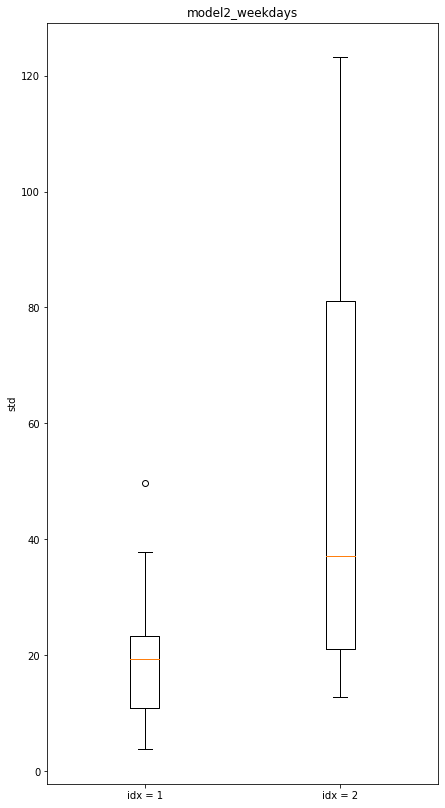

In [14]:
title = 'model2_weekdays'
plt.rcParams["figure.figsize"] = (7,14)

for i in range(min(std_idx_ends.loc[:, 'num_cluster']), \
               max(std_idx_ends.loc[:, 'num_cluster']) + 1) :
    temp_days = std_idx_days[std_idx_days['num_cluster'] == i].loc[:, 'std']
    temp_days.reset_index(drop = True, inplace = True)
    
    name = 'bp_{}'.format(i)
    locals()[name] = plt.boxplot(temp_days, positions = [i + 1])
    
xticks_list = []
xticks_name = []
for i in range(min(std_idx_ends.loc[:, 'num_cluster']), \
               max(std_idx_ends.loc[:, 'num_cluster']) + 1) :
    xticks_list.append(i + 1)
    xticks_name.append('idx = {}'.format(i + 1))

plt.xticks(xticks_list, xticks_name)
plt.ylabel('std')
plt.title("{}".format(title))
os.chdir(model2dir)
plt.savefig('weekdays_boxplot.png', dpi=400)
plt.show()


# Model 4

1) 모델 3의 전처리 데이터(일별 합으로 나눈 데이터) - 모델 3 프로필  
2) 클러스터별로 48시간 프로필 확인해서 비교

In [15]:
from imp import reload 
reload(lib)
os.chdir(model3dir)

hours = []
for i in range(1, 25) :
    hours.append(str(i))

df = pd.DataFrame(columns = ['excel'] + hours)
df_num = 0

for folder in os.listdir(model3dir) :
    profile = lib.read_excel('profile_48.xlsx')
    
for folder in os.listdir(model3dir) :
    tempdir = model3dir + '\\' + folder
    if os.path.isdir(tempdir) :
        if '주중' in folder :
            for excel in os.listdir(tempdir) :
                os.chdir(tempdir)
                temp = lib.read_excel(excel)
                temp.columns = temp.columns.astype(str)
                
                profile = pd.DataFrame(columns = hours)
                for cat in temp.columns :
                    profile.loc[0, cat] = temp.loc[:, cat].mean()
                        
                for i in range(temp.shape[0]) :
                    df.loc[df_num, 'excel'] = excel + '_{}'.format(i)
                    for cat in temp.columns :
                        df.loc[df_num, cat] = temp.loc[i, cat] - profile.loc[0, cat]
                    df_num += 1
                    
                    
                print('{} done'.format(excel), end = '\r')

os.chdir(model4dir)                
df.to_excel('model4_weekdays.xlsx')
print('model4_weekdays.xlsx saved')

model4_weekdays.xlsx saveddoneee


In [16]:
from imp import reload 
reload(lib)
os.chdir(model3dir)

hours = []
for i in range(1, 25) :
    hours.append(str(i))

df = pd.DataFrame(columns = ['excel'] + hours)
df_num = 0

for folder in os.listdir(model3dir) :
    profile = lib.read_excel('profile_48.xlsx')
    
for folder in os.listdir(model3dir) :
    tempdir = model3dir + '\\' + folder
    if os.path.isdir(tempdir) :
        if '주말' in folder :
            for excel in os.listdir(tempdir) :
                os.chdir(tempdir)
                temp = lib.read_excel(excel)
                temp.columns = temp.columns.astype(str)
                
                profile = pd.DataFrame(columns = hours)
                for cat in temp.columns :
                    profile.loc[0, cat] = temp.loc[:, cat].mean()
                        
                for i in range(temp.shape[0]) :
                    df.loc[df_num, 'excel'] = excel + '_{}'.format(i)
                    for cat in temp.columns :
                        df.loc[df_num, cat] = temp.loc[i, cat] - profile.loc[0, cat]
                    df_num += 1
                    
                    
                print('{} done'.format(excel), end = '\r')

os.chdir(model4dir)                
df.to_excel('model4_weekends.xlsx')
print('model4_weekends.xlsx saved')

model4_weekends.xlsx saveddoneee


### idx 별로 model4 만들기

In [21]:
os.chdir(model4dir)
df_days = lib.read_excel('model4_weekdays.xlsx')

os.chdir(model3cluster)
idx = lib.read_excel('세대별_군집_번호.xlsx')

hours = []
for i in range(1, 25) :
    hours.append(str(i))
    
# print(idx)
# print(df_days)

for cluster_num in range(min(idx.loc[:, 'num_cluster']), max(idx.loc[:, 'num_cluster']) + 1) :
    locals()['idx{}'.format(cluster_num)] = pd.DataFrame(columns = ['excel'] + hours)
    locals()['idx{}_num'.format(cluster_num)] = 0



for i in range(df_days.shape[0]) :
    for j in range(idx.shape[0]) :
        at = df_days.loc[i, 'excel'].find('x') - 3
        
        if df_days.loc[i, 'excel'][ : at] == idx.loc[j, 'excel'] :
            for cluster_num in range(min(idx.loc[:, 'num_cluster']), max(idx.loc[:, 'num_cluster']) + 1) :
                if idx.loc[j, 'num_cluster'] == cluster_num :
                    locals()['idx{}'.format(cluster_num)].loc\
                    [locals()['idx{}_num'.format(cluster_num)], 'excel'] = df_days.loc[i, 'excel']
                    locals()['idx{}'.format(cluster_num)].loc\
                    [locals()['idx{}_num'.format(cluster_num)], '1' : '24'] = df_days.loc[i, '1' : '24']
                    locals()['idx{}_num'.format(cluster_num)] += 1

                    print('{}th, {} done'.format(i, df_days.loc[i, 'excel'][ : 18]), end = '\r')

for folder in os.listdir(model4dir) :
    if '주중' in folder :
        tempdir = model4dir + '\\' + folder
        os.chdir(tempdir)

for cluster_num in range(min(idx.loc[:, 'num_cluster']), max(idx.loc[:, 'num_cluster']) + 1) :
    print(locals()['idx{}'.format(cluster_num)])
    locals()['idx{}'.format(cluster_num)].to_excel('idx{}.xlsx'.format(cluster_num))

                               excel         1         2         3         4  \
0        [P.교육 서비스업(85)]_0_주중.xlsx_0  0.022797  0.023088    0.0228  0.022899   
1        [P.교육 서비스업(85)]_0_주중.xlsx_1  0.013738  0.014544  0.013793  0.014547   
2        [P.교육 서비스업(85)]_0_주중.xlsx_2  0.008993  0.009516  0.007546  0.007762   
3        [P.교육 서비스업(85)]_0_주중.xlsx_3  0.009819  0.012661   0.01188  0.010821   
4        [P.교육 서비스업(85)]_0_주중.xlsx_4  0.010726   0.00867  0.007986  0.007973   
...                              ...       ...       ...       ...       ...   
11688  [P.교육 서비스업(85)]_9_주중.xlsx_256  0.014284  0.019025  0.015272  0.013967   
11689  [P.교육 서비스업(85)]_9_주중.xlsx_257 -0.014443 -0.014877 -0.014756 -0.013986   
11690  [P.교육 서비스업(85)]_9_주중.xlsx_258 -0.005254 -0.006913 -0.005767  -0.00454   
11691  [P.교육 서비스업(85)]_9_주중.xlsx_259 -0.013804 -0.013253 -0.014296 -0.014106   
11692  [P.교육 서비스업(85)]_9_주중.xlsx_260 -0.009822 -0.008993 -0.009793 -0.009331   

              5         6         7    

In [23]:
os.chdir(model4dir)
df_ends = lib.read_excel('model4_weekends.xlsx')

os.chdir(model3cluster)
idx = lib.read_excel('세대별_군집_번호.xlsx')

hours = []
for i in range(1, 25) :
    hours.append(str(i))
    

for cluster_num in range(min(idx.loc[:, 'num_cluster']), max(idx.loc[:, 'num_cluster']) + 1) :
    locals()['idx{}'.format(cluster_num)] = pd.DataFrame(columns = ['excel'] + hours)
    locals()['idx{}_num'.format(cluster_num)] = 0



for i in range(df_ends.shape[0]) :
    for j in range(idx.shape[0]) :
        at = df_ends.loc[i, 'excel'].find('x') - 3
        
        if df_ends.loc[i, 'excel'][ : at] == idx.loc[j, 'excel'] :
            for cluster_num in range(min(idx.loc[:, 'num_cluster']), max(idx.loc[:, 'num_cluster']) + 1) :
                if idx.loc[j, 'num_cluster'] == cluster_num :
                    locals()['idx{}'.format(cluster_num)].loc\
                    [locals()['idx{}_num'.format(cluster_num)], 'excel'] = df_ends.loc[i, 'excel']
                    locals()['idx{}'.format(cluster_num)].loc\
                    [locals()['idx{}_num'.format(cluster_num)], '1' : '24'] = df_ends.loc[i, '1' : '24']
                    locals()['idx{}_num'.format(cluster_num)] += 1

                    print('{}th, {} done'.format(i, df_ends.loc[i, 'excel'][ : 18]), end = '\r')

for folder in os.listdir(model4dir) :
    if '주말' in folder :
        tempdir = model4dir + '\\' + folder
        os.chdir(tempdir)

for cluster_num in range(min(idx.loc[:, 'num_cluster']), max(idx.loc[:, 'num_cluster']) + 1) :
    print(locals()['idx{}'.format(cluster_num)])
    locals()['idx{}'.format(cluster_num)].to_excel('idx{}.xlsx'.format(cluster_num))

                              excel         1         2         3         4  \
0       [P.교육 서비스업(85)]_0_주말.xlsx_0  0.000102 -0.002881 -0.002489 -0.002247   
1       [P.교육 서비스업(85)]_0_주말.xlsx_1  0.004304  0.004511  0.005399  0.009237   
2       [P.교육 서비스업(85)]_0_주말.xlsx_2 -0.000597  0.000098  0.002866  0.002997   
3       [P.교육 서비스업(85)]_0_주말.xlsx_3  0.002335   0.00477  0.002731  0.001981   
4       [P.교육 서비스업(85)]_0_주말.xlsx_4  0.000822   0.00593  0.004541  0.001065   
...                             ...       ...       ...       ...       ...   
4606   [P.교육 서비스업(85)]_9_주말.xlsx_98  -0.00878 -0.011184 -0.010885 -0.007541   
4607   [P.교육 서비스업(85)]_9_주말.xlsx_99 -0.023783 -0.022159  -0.01957 -0.020984   
4608  [P.교육 서비스업(85)]_9_주말.xlsx_100   -0.0123 -0.008713 -0.012059 -0.012018   
4609  [P.교육 서비스업(85)]_9_주말.xlsx_101 -0.016323 -0.011573 -0.014288 -0.015699   
4610  [P.교육 서비스업(85)]_9_주말.xlsx_102 -0.014339  -0.01652 -0.017146 -0.017282   

             5         6         7         8       

In [26]:
print(lib.pernull(df_days))
print(lib.pernull(df_ends))
for cluster_num in range(min(idx.loc[:, 'num_cluster']), max(idx.loc[:, 'num_cluster']) + 1) :
    print(lib.pernull(locals()['idx{}'.format(cluster_num)]))

for folder in os.listdir(model4dir) :
    tempdir = model4dir + '\\' + folder
    if os.path.isdir(tempdir) :
        for excel in os.listdir(tempdir) :
            os.chdir(tempdir)
            temp = lib.read_excel(excel)
            print('{} pernull is {}'.format(excel, lib.pernull(temp)))

0.0
0.0
0.0
0.0
idx0.xlsx pernull is 0.0
idx1.xlsx pernull is 0.0
idx0.xlsx pernull is 0.0
idx1.xlsx pernull is 0.0


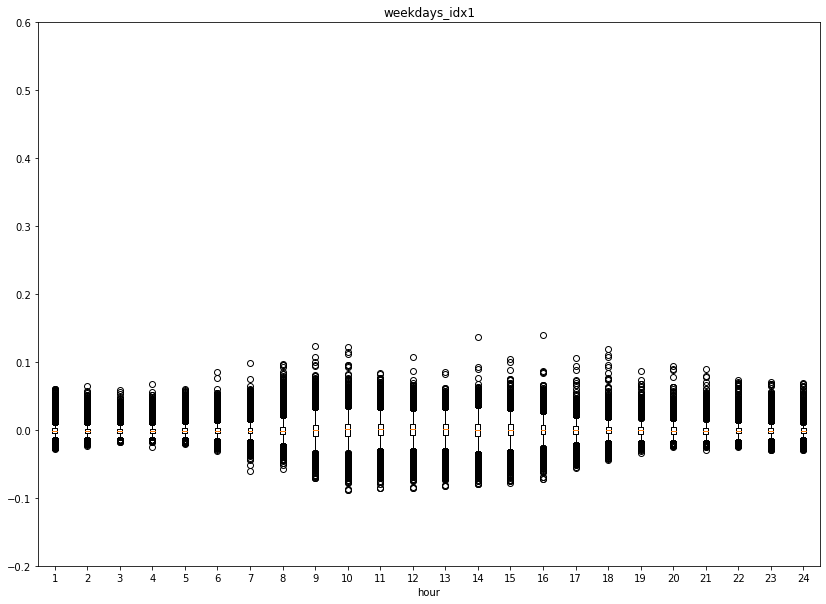

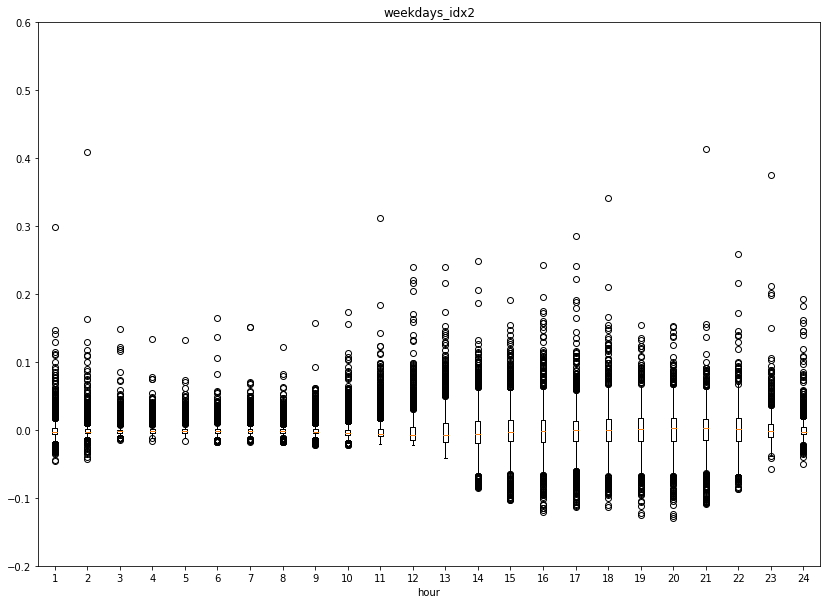

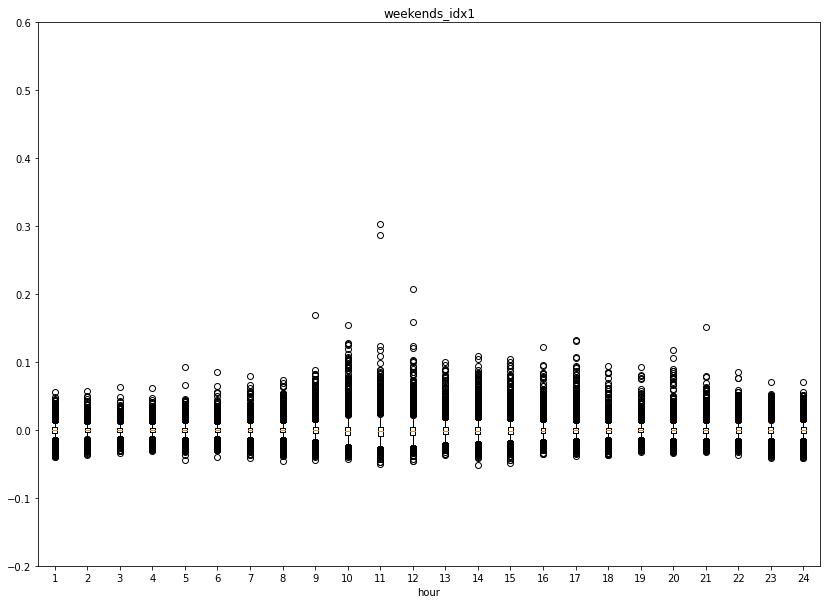

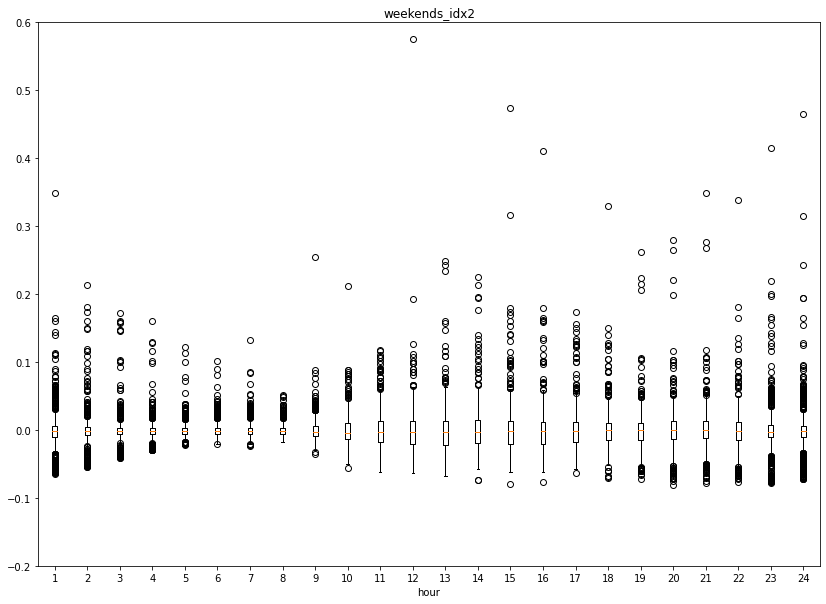

In [33]:
# weekdays

os.chdir(model4dir + '\\' + '[P.교육 서비스업(85)]_주중')
idx0 = lib.read_excel('idx0.xlsx')
idx1 = lib.read_excel('idx1.xlsx')

title = 'weekdays_idx1'
plt.rcParams["figure.figsize"] = (14,10)
for i in range(1, 25) :
    temp = plt.boxplot(idx0.loc[:, '{}'.format(i)], positions = [i])
plt.xlabel('hour')
# plt.ylabel('')
plt.title("{}".format(title))
plt.ylim([-0.2, 0.6])
os.chdir(model4dir)
plt.savefig('{}.png'.format(title), dpi=400)
plt.show()

title = 'weekdays_idx2'
plt.rcParams["figure.figsize"] = (14,10)
for i in range(1, 25) :
    temp = plt.boxplot(idx1.loc[:, '{}'.format(i)], positions = [i])
plt.xlabel('hour')
# plt.ylabel('')
plt.title("{}".format(title))
plt.ylim([-0.2, 0.6])
os.chdir(model4dir)
plt.savefig('{}.png'.format(title), dpi=400)
plt.show()


# weekends

os.chdir(model4dir + '\\' + '[P.교육 서비스업(85)]_주말')
idx0 = lib.read_excel('idx0.xlsx')
idx1 = lib.read_excel('idx1.xlsx')
title = 'weekends_idx1'
plt.rcParams["figure.figsize"] = (14,10)
for i in range(1, 25) :
    temp = plt.boxplot(idx0.loc[:, '{}'.format(i)], positions = [i])
plt.xlabel('hour')
# plt.ylabel('')
plt.title("{}".format(title))
plt.ylim([-0.2, 0.6])
os.chdir(model4dir)
plt.savefig('{}.png'.format(title), dpi=400)
plt.show()

title = 'weekends_idx2'
plt.rcParams["figure.figsize"] = (14,10)
for i in range(1, 25) :
    temp = plt.boxplot(idx1.loc[:, '{}'.format(i)], positions = [i])
plt.xlabel('hour')
# plt.ylabel('')
plt.title("{}".format(title))
plt.ylim([-0.2, 0.6])
os.chdir(model4dir)
plt.savefig('{}.png'.format(title), dpi=400)
plt.show()